<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/Exercise_Thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Importing the dataset

In [11]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')


## Implementing Thompson Sampling

calculating the ad having the highest convergence(selection) rate

In [26]:
import random
N  = 300
d = 10
ads_selected = []
number_of_reward_1 = [0] * d
number_of_reward_0 = [0] * d
total_reward = 0
for n in range(0,N):
  ad = 0
  max_random = 0
  for i in range(0,d):
    random_beta = random.betavariate(number_of_reward_1[i]+1,number_of_reward_0[i]+1)
    if random_beta>max_random:
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  rewards = df.values[n,ad]
  if rewards == 1:
    number_of_reward_1[ad] = number_of_reward_1[ad] + 1
  else:
    number_of_reward_0[ad]  = number_of_reward_0[ad] + 1
  total_reward = total_reward + rewards

## Visualising the results - Histogram

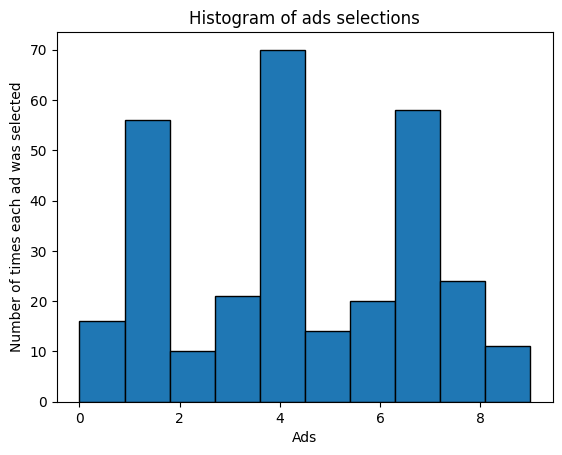

In [27]:
plt.hist(ads_selected,edgecolor="black")
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()